In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rc('figure', figsize = (15,10))

In [2]:
dff_1415 = pd.read_pickle('./dataset/fall1415.pkl')
dff_1415

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS
0,08068631,07122,2014-09-06,17,B,8,0802,B080203,028,M,40세~44세,100,14000,2014,B8
1,08942410,17967,2014-11-30,15,B,15,1502,B150203,050,M,20세~24세,100,1750,2014,B15
2,08942410,17967,2014-11-30,15,B,47,4703,B470302,050,M,20세~24세,100,7900,2014,B47
3,08942410,17967,2014-11-30,15,B,77,7707,B770702,050,M,20세~24세,100,16898,2014,B77
4,08942410,17967,2014-11-30,15,B,82,8202,B820201,050,M,20세~24세,100,7731,2014,B82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449415,07143341,08054,2015-10-20,18,B,45,4506,B450601,013,F,35세~39세,055,15800,2015,B45
3449416,07143342,05446,2015-10-20,19,B,18,1807,B180707,013,F,45세~49세,055,2000,2015,B18
3449417,07598192,01584,2015-09-16,10,B,90,9001,B900103,018,F,55세~59세,100,11850,2015,B90
3449418,07598193,00033,2015-09-16,15,B,5,0510,B051005,018,M,60세이상,100,3160,2015,B5


In [2]:
# 가을시즌 제휴사별 매출총액

df = pd.read_pickle('dataset/set_data.pkl')


AFFIL
A    143519702520
B     27310194457
C     13084071419
D       251521929
Name: PURCHAMOUNT, dtype: int64

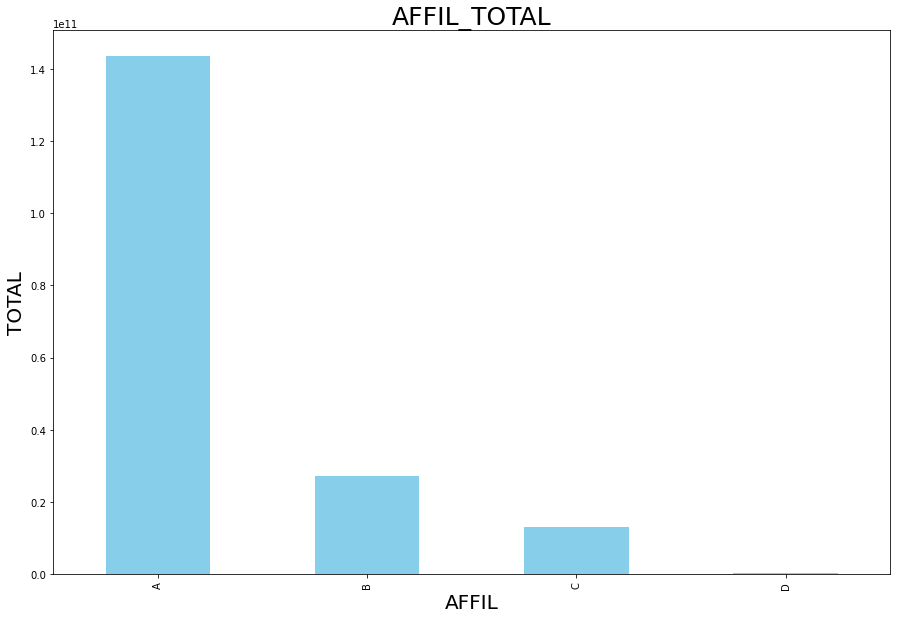

In [4]:
# 가을시즌 제휴사별 매출 총액
plt.title('AFFIL_TOTAL', size = 25)
plt.xlabel('AFFIL',size =20)
plt.ylabel('TOTAL',size =20)
a = df.groupby('AFFIL').sum()['PURCHAMOUNT']
a.plot(kind='bar',color = 'skyblue')
a

AFFIL
A    101880.883537
B      8554.544293
C      5716.856122
D      8363.712599
Name: PURCHAMOUNT, dtype: float64

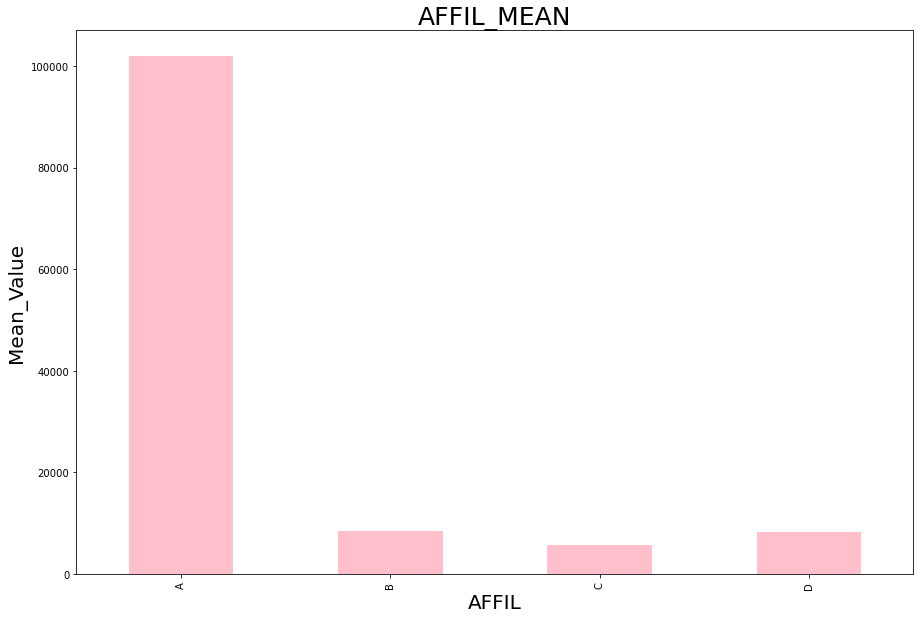

In [14]:
# 가을시즌 제휴사별 매출 평균
plt.title('AFFIL_MEAN', size = 25)
plt.xlabel('AFFIL',size =20)
plt.ylabel('Mean_Value',size =20)
a = df.groupby('AFFIL').mean()['PURCHAMOUNT']
a.plot(kind='bar', color = 'pink' )
a

B    3192478
C    2288683
A    1408701
D      30073
Name: AFFIL, dtype: int64

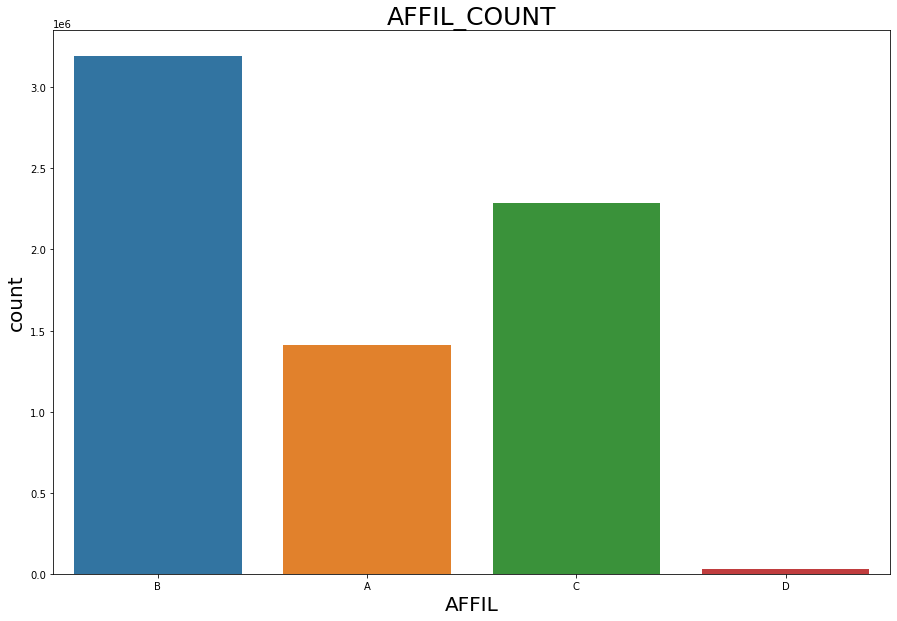

In [15]:
# 제휴사별 구매빈도
plt.title('AFFIL_COUNT', size = 25)
plt.xlabel('AFFIL',size =20)
plt.ylabel('COUNT',size =20)
sns.countplot('AFFIL', data = df)
df.AFFIL.value_counts()

AFFIL_CLASS
A1    17001742540
A2    20498515940
A3     4803193580
A4    43935622740
A5     9621540180
         ...     
D4       32255090
D5        8923400
D6       12986100
D7        9199800
D8       38451450
Name: PURCHAMOUNT, Length: 125, dtype: int64

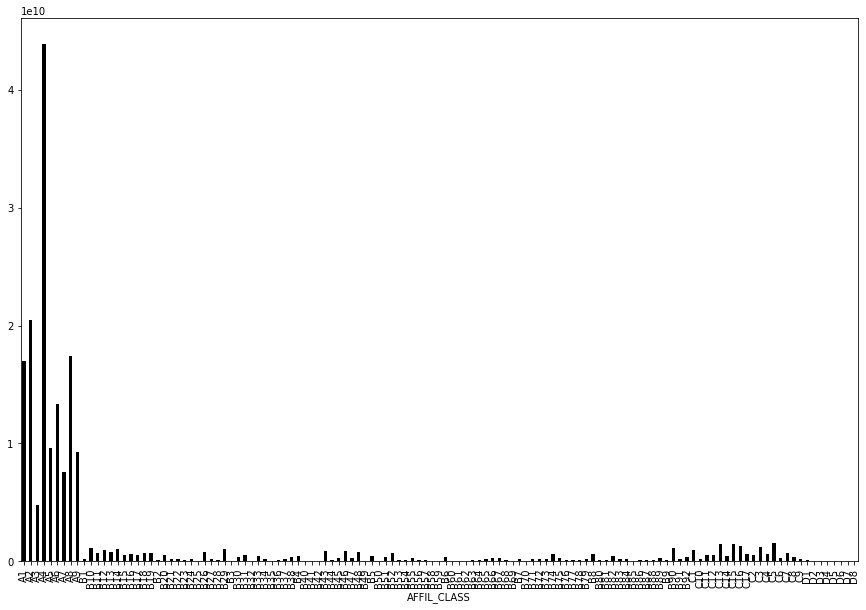

In [6]:
a = df.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT']
a.plot(kind='bar',color = 'black')
a


In [5]:
total_food = ['A1','B1', 'B2', 'B3', 'B4', 'B5', 'B6',
          'B7', 'B9', 'B10', 'B11', 'B12', 'B13', 'B14', 'B15', 'B16','B37', 'B38',
          'B43', 'B46', 'B47', 'B48','B52', 'B53', 'B54', 'B55',
          'B56', 'B57', 'B58', 'B59', 'B60', 'B61', 'B62', 'B63',
          'B64', 'B65', 'B67', 'B72','B81', 'B82', 'B83', 'B89', 'B91', 'B92',
         'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9',
         'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'D4']


total_nor = ['A2', 'A3', 'A9', 'A10', 'B17',
        'B18', 'B19', 'B20', 'B21', 'B22', 'B23', 'B24', 'B25', 'B31', 'B32',
         'B34', 'B35', 'B66', 'B67','B77', 'B79', 'B80', 'B84', 'B86', 'B87', 'B88',
             'C16', 'C17', 'D1', 'D2', 'D3', 'D5', 'D6', 'D7']

total_cloth = ['A4', 'A5', 'B29','B30', 'B32', 'B33', 'B44',
               'B49', 'B50', 'B51', 'B68', 'B69']

total_hobby = ['A6', 'B25', 'B26', 'B27', 'B35', 'B36', 'B71']

total_rich = ['A8', 'B28', 'B70']
total_etc = ['B8', 'B45', 'B90', 'D7', 'D8']


def prod_cat(data):
    if data in total_food:
        return 'Food'
    elif data in total_nor:
        return 'Item'
    elif data in total_cloth:
        return 'Cloth'
    elif data in total_hobby:
        return 'Hobby'
    elif data in total_rich:
        return 'Rich'
    elif data in total_etc:
        return 'Etc'
    

df['prod_cat'] = df.AFFIL_CLASS.map(prod_cat)
df


,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
0,08068631,07122,2014-09-06,17,B,8,0802,B080203,028,M,40세~44세,100,14000,2014,B8,Etc
1,08942410,17967,2014-11-30,15,B,15,1502,B150203,050,M,20세~24세,100,1750,2014,B15,Food
2,08942410,17967,2014-11-30,15,B,47,4703,B470302,050,M,20세~24세,100,7900,2014,B47,Food
3,08942410,17967,2014-11-30,15,B,77,7707,B770702,050,M,20세~24세,100,16898,2014,B77,Item
4,08942410,17967,2014-11-30,15,B,82,8202,B820201,050,M,20세~24세,100,7731,2014,B82,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449415,07143341,08054,2015-10-20,18,B,45,4506,B450601,013,F,35세~39세,055,15800,2015,B45,Etc
3449416,07143342,05446,2015-10-20,19,B,18,1807,B180707,013,F,45세~49세,055,2000,2015,B18,Item
3449417,07598192,01584,2015-09-16,10,B,90,9001,B900103,018,F,55세~59세,100,11850,2015,B90,Etc
3449418,07598193,00033,2015-09-16,15,B,5,0510,B051005,018,M,60세이상,100,3160,2015,B5,Food


In [6]:
ndf[ndf.prod_cat.isnull()]

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
19,08710614,09826,2014-11-27,17,B,74,7401,B740101,044,F,30세~34세,100,2750,2014,B74,None
26,08710615,17694,2014-11-27,18,B,73,7304,B730402,044,F,50세~54세,100,1980,2014,B73,None
62,08710118,17747,2014-11-24,22,B,74,7401,B740101,044,F,45세~49세,100,3170,2014,B74,None
200,07070061,03849,2014-10-30,16,B,74,7404,B740401,013,F,45세~49세,055,4960,2014,B74,None
205,07070062,04275,2014-10-30,16,B,73,7304,B730402,013,F,45세~49세,055,5980,2014,B73,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449322,08832227,17341,2015-09-15,16,B,73,7304,B730402,046,F,45세~49세,100,3300,2015,B73,None
3449337,10721363,16846,2015-09-19,18,B,73,7302,B730203,125,M,30세~34세,240,5500,2015,B73,None
3449374,10721393,12529,2015-09-20,22,B,74,7401,B740101,125,F,45세~49세,240,6340,2015,B74,None
3449383,10721395,16686,2015-09-20,21,B,74,7401,B740101,125,M,40세~44세,240,3170,2015,B74,None


In [13]:
ndf[ndf['AFFIL_CLASS'] == 'B28']

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
1216,07994316,14707,2014-10-04,13,B,28,2806,B280606,027,M,35세~39세,460,1150,2014,B28,사치
1895,08226051,12596,2014-11-01,21,B,28,2806,B280601,032,F,25세~29세,210,19600,2014,B28,사치
1896,08226051,12596,2014-11-01,21,B,28,2806,B280605,032,F,25세~29세,210,17380,2014,B28,사치
1897,08226051,12596,2014-11-01,21,B,28,2812,B281203,032,F,25세~29세,210,49000,2014,B28,사치
2927,08228107,15218,2014-11-22,17,B,28,2811,B281101,032,F,45세~49세,210,13500,2014,B28,사치
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446697,10589309,10546,2015-10-17,20,B,28,2807,B280702,118,F,45세~49세,570,16210,2015,B28,사치
3446941,10312308,04892,2015-10-18,19,B,28,2806,B280606,104,F,45세~49세,100,5900,2015,B28,사치
3447488,07599705,09820,2015-11-07,22,B,28,2809,B280903,018,F,30세~34세,049,3900,2015,B28,사치
3447883,07599689,08773,2015-11-06,18,B,28,2809,B280904,018,F,35세~39세,100,6000,2015,B28,사치


In [6]:
df_food = df.loc[df.prod_cat=='Food']
df_nor = df.loc[df.prod_cat=='Nor']
df_cloth = df.loc[df.prod_cat=='Cloth']
df_hobby = df.loc[df.prod_cat=='Hobby']
df_rich = df.loc[df.prod_cat=='Rich']
df_etc = df.loc[df.prod_cat=='Etc']

In [7]:
# df.loc[df_AFFIL_CLASS=='A7'].index
df = df.drop(df.loc[df.AFFIL_CLASS=='A7'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B74'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B73'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B75'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B76'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B78'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B85'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B39'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B40'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B41'].index, axis=0)
df = df.drop(df.loc[df.AFFIL_CLASS=='B42'].index, axis=0)
df

,RECEIPTNO,CUSTNO,PURCHDATE,PURCHTIME,AFFIL,CLASSCODEL,CLASSCODEM,CLASSCODES,STORENO,GENDER,AGEGROUP,RESIDENCE,PURCHAMOUNT,Year,AFFIL_CLASS,prod_cat
0,08068631,07122,2014-09-06,17,B,8,0802,B080203,028,M,40세~44세,100,14000,2014,B8,Etc
2,08942410,17967,2014-11-30,15,B,47,4703,B470302,050,M,20세~24세,100,7900,2014,B47,Food
3,08942410,17967,2014-11-30,15,B,77,7707,B770702,050,M,20세~24세,100,16898,2014,B77,Item
4,08942410,17967,2014-11-30,15,B,82,8202,B820201,050,M,20세~24세,100,7731,2014,B82,Food
5,08942410,17967,2014-11-30,15,B,89,8901,B890103,050,M,20세~24세,100,7800,2014,B89,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449415,07143341,08054,2015-10-20,18,B,45,4506,B450601,013,F,35세~39세,055,15800,2015,B45,Etc
3449416,07143342,05446,2015-10-20,19,B,18,1807,B180707,013,F,45세~49세,055,2000,2015,B18,Item
3449417,07598192,01584,2015-09-16,10,B,90,9001,B900103,018,F,55세~59세,100,11850,2015,B90,Etc
3449418,07598193,00033,2015-09-16,15,B,5,0510,B051005,018,M,60세이상,100,3160,2015,B5,Food


In [8]:
df.to_pickle('dataset/set_data.pkl')

In [14]:
df_etc.구매금액.describe()

count    7.187900e+04
mean     2.893078e+04
std      9.954952e+04
min      1.000000e+01
25%      5.700000e+03
50%      1.200000e+04
75%      2.920000e+04
max      1.500000e+07
Name: 구매금액, dtype: float64

In [15]:
df_rich.구매금액.describe()

count      2590.000000
mean      15256.567568
std       17965.723340
min         300.000000
25%        7000.000000
50%       10000.000000
75%       17000.000000
max      195000.000000
Name: 구매금액, dtype: float64

<AxesSubplot:xlabel='AFFIL_CLASS'>

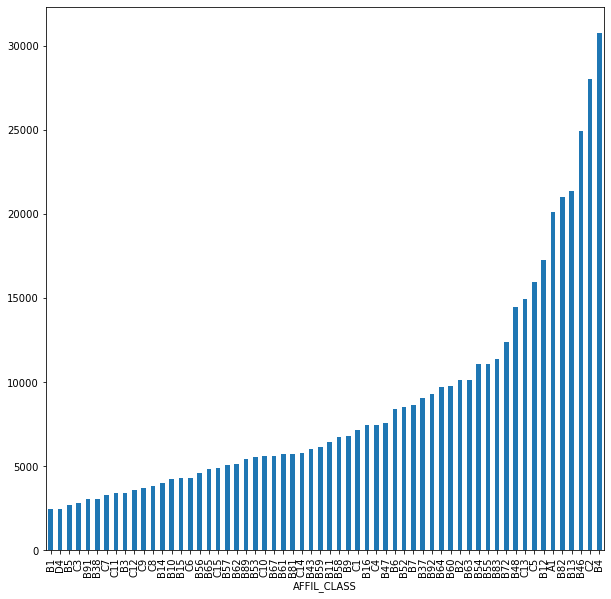

In [25]:
# 식품군 대분류코드별 구매가격(평균)

fig = plt.figure(figsize=(10,10))
d = df_food.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')


<AxesSubplot:xlabel='AFFIL_CLASS'>

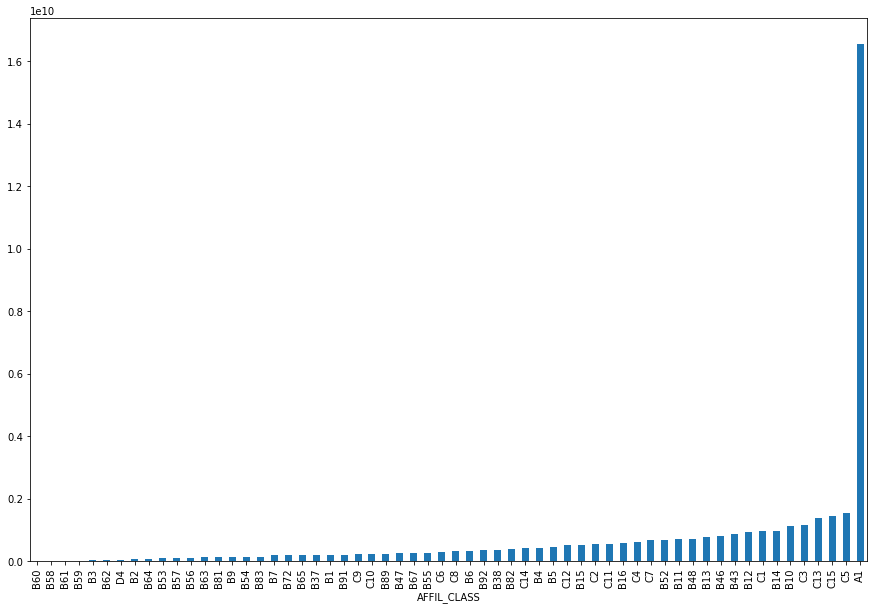

In [67]:
# 식품 대분류코드별 구매가격(총)

d = df_food.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')


<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

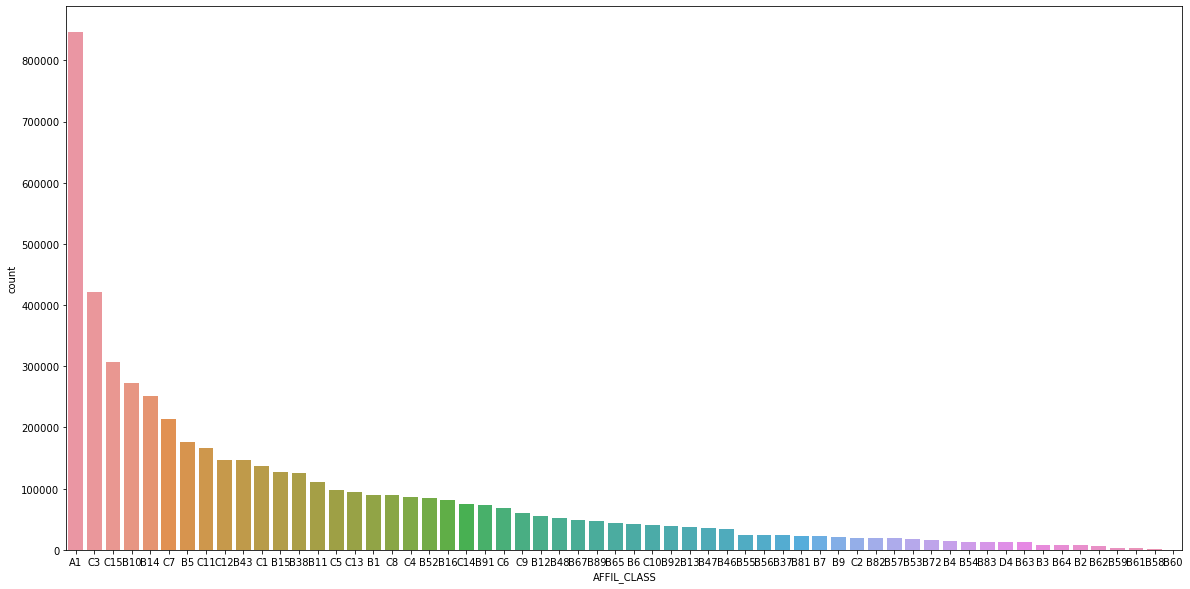

In [23]:
# 식품 - 분류코드별 구매빈도

sns.countplot('AFFIL_CLASS', data = df_food,order = df_food['AFFIL_CLASS'].value_counts().index)


<AxesSubplot:xlabel='AFFIL_CLASS'>

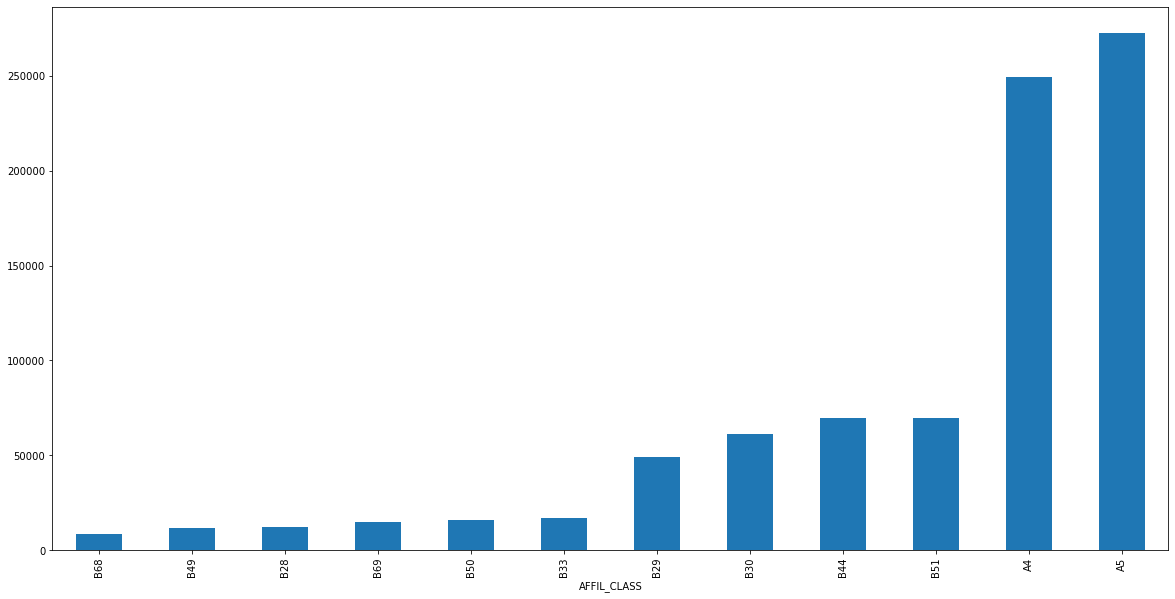

In [75]:
# 의류 - 대분류코드별 구매가격(평균)

d = df_cloth.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')


AFFIL_CLASS
B49       31969450
B69       32434580
B50       36495950
B28       82003850
B68       96130950
B44      125445070
B51      347973300
B30      353560430
B33      400268220
B29      991737590
A5      9371655760
A4     42821012450
Name: PURCHAMOUNT, dtype: int64

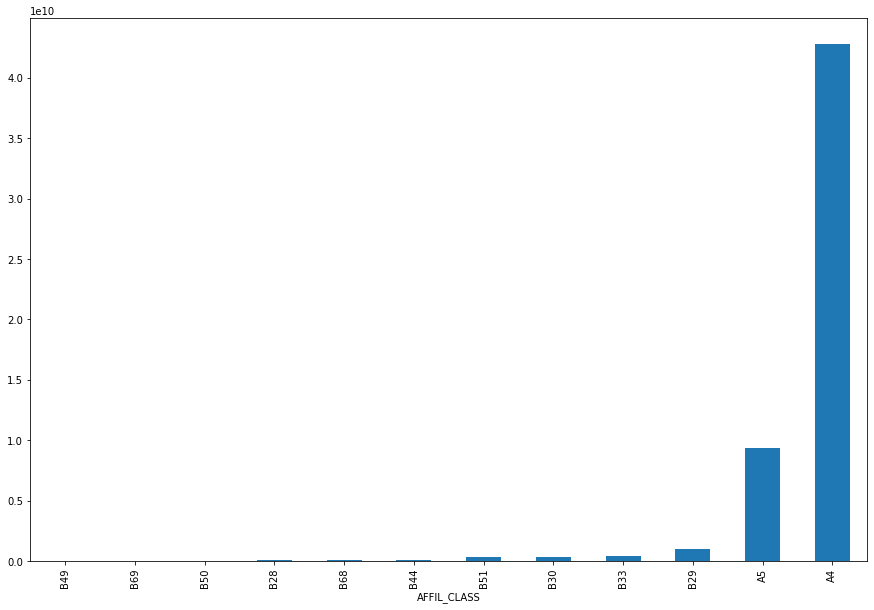

In [54]:
# 의류 - 대분류코드별 구매가격(총액)

d = df_cloth.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
d

<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

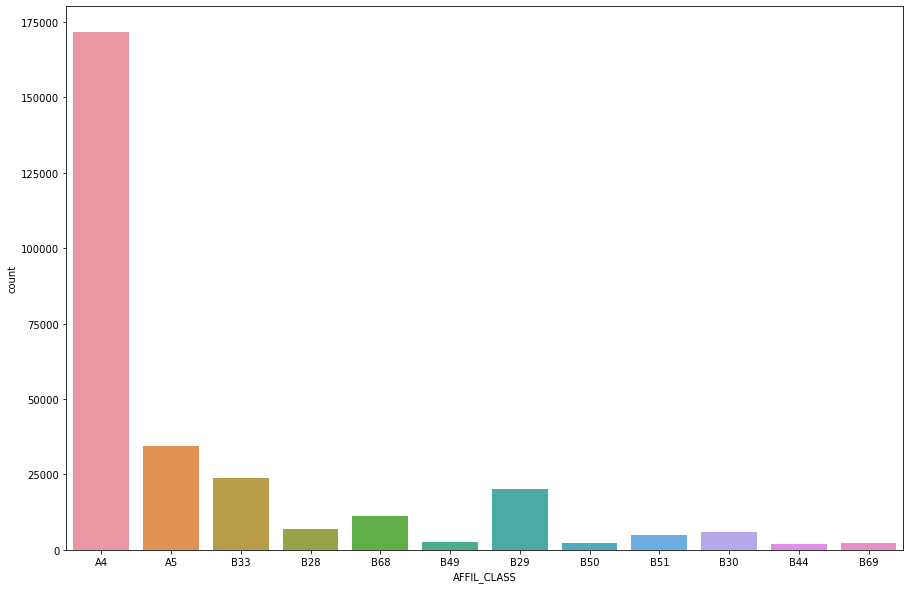

In [27]:
# 의류 - 대분류코드별 구매빈도

sns.countplot('AFFIL_CLASS', data = df_cloth , orient = 'h') 


<AxesSubplot:xlabel='AFFIL_CLASS'>

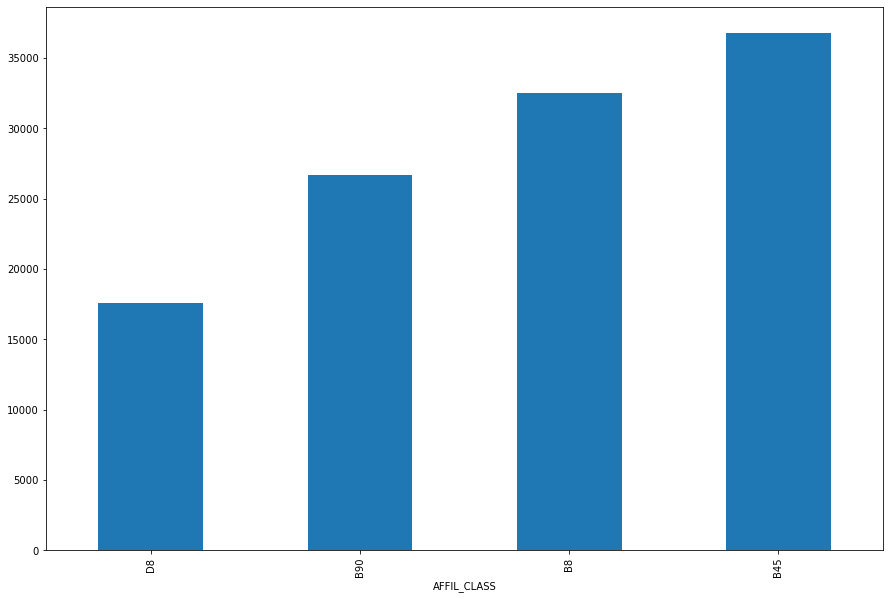

In [41]:
# 기타 - 대분류코드별 구매가격(평균)

d = df_etc.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')

AFFIL_CLASS
D8       37315360
B45     290694940
B8      562424011
B90    1130755310
Name: PURCHAMOUNT, dtype: int64

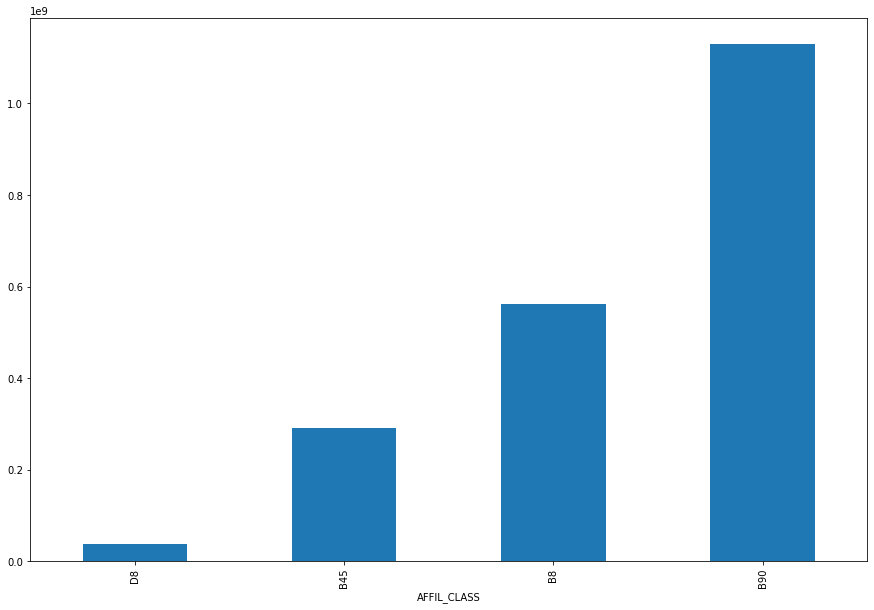

In [53]:
# 기타 - 대분류코드별 구매가격(총액)

d = df_etc.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
d

<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

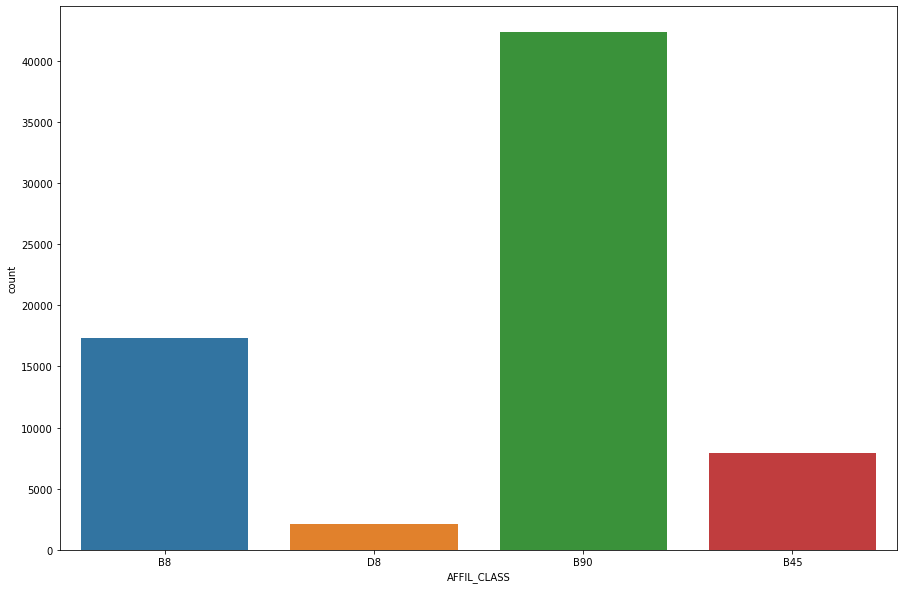

In [39]:
# 기타 - 대분류코드별 구매빈도

sns.countplot('AFFIL_CLASS', data = df_etc )

AFFIL_CLASS
B27     11451.159633
B36     22721.115385
B26     28403.673626
B71     53859.778481
A6     195787.594637
Name: PURCHAMOUNT, dtype: float64

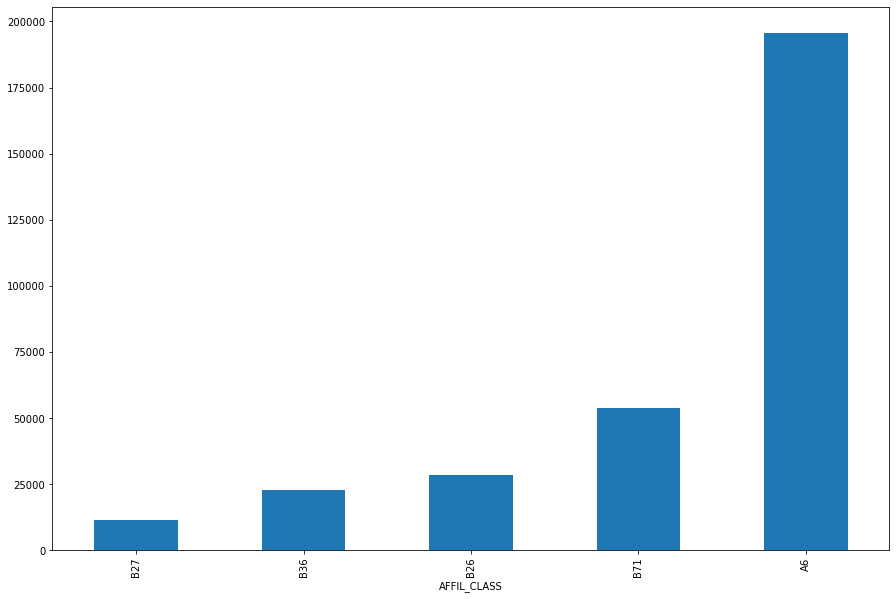

In [52]:
# 취미 - 대분류코드별 구매가격(평균)


d = df_hobby.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
d

AFFIL_CLASS
B36       64982390
B27      163625620
B71      221255970
B26      741477900
A6     13054333660
Name: PURCHAMOUNT, dtype: int64

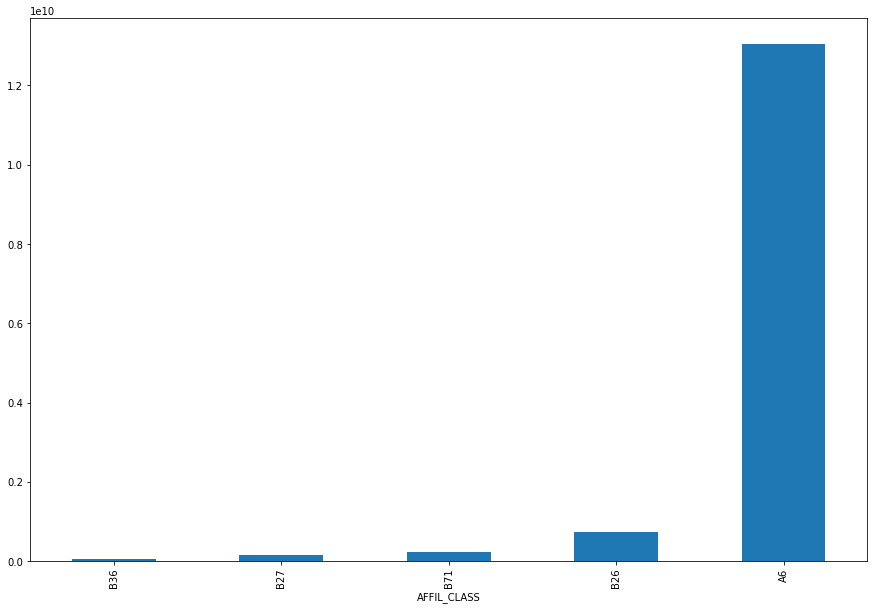

In [66]:
# 취미 - 대분류코드별 구매가격(총액)


d = df_hobby.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
d

<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

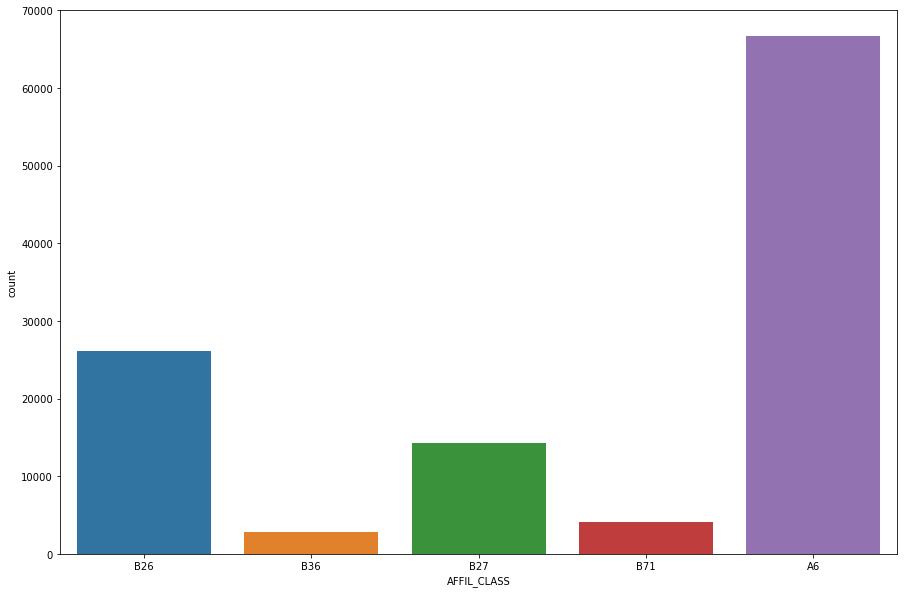

In [65]:
# 취미 - 대분류코드별 구매빈도

sns.countplot('AFFIL_CLASS', data = df_hobby)

AFFIL_CLASS
B28      12040.47
B70      15256.57
A8     1009571.85
Name: PURCHAMOUNT, dtype: float64

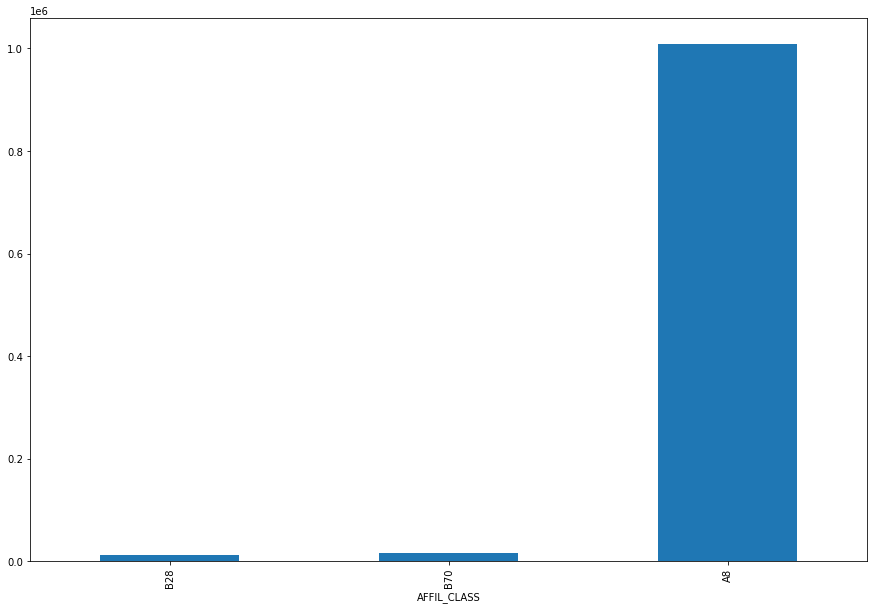

In [20]:
# 사치 - 대분류코드별 구매가격(평균)
d = df_rich.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
d.round(2)

AFFIL_CLASS
B70       39514510
B28       84078600
A8     17399970780
Name: PURCHAMOUNT, dtype: int64

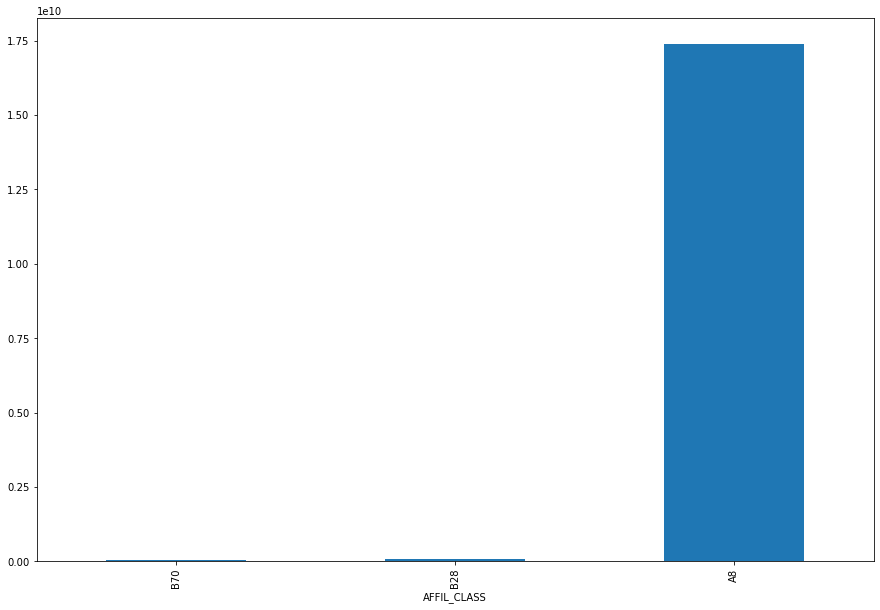

In [19]:
# 사치 - 대분류코드별 구매가격(총액)
d = df_rich.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')
d

<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

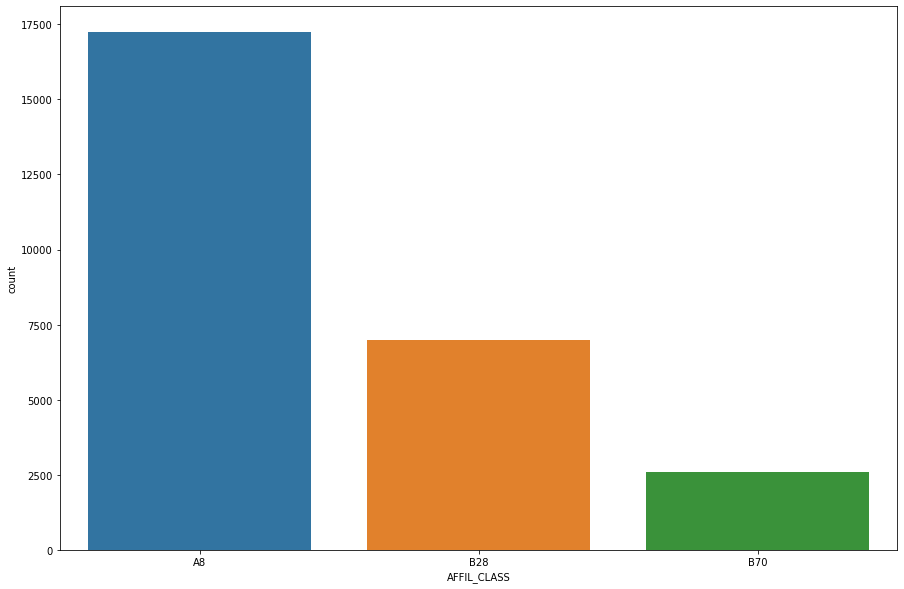

In [34]:
# 사치 - 대분류코드별 구매빈도

sns.countplot('AFFIL_CLASS',data = df_rich) 



<AxesSubplot:xlabel='AFFIL_CLASS'>

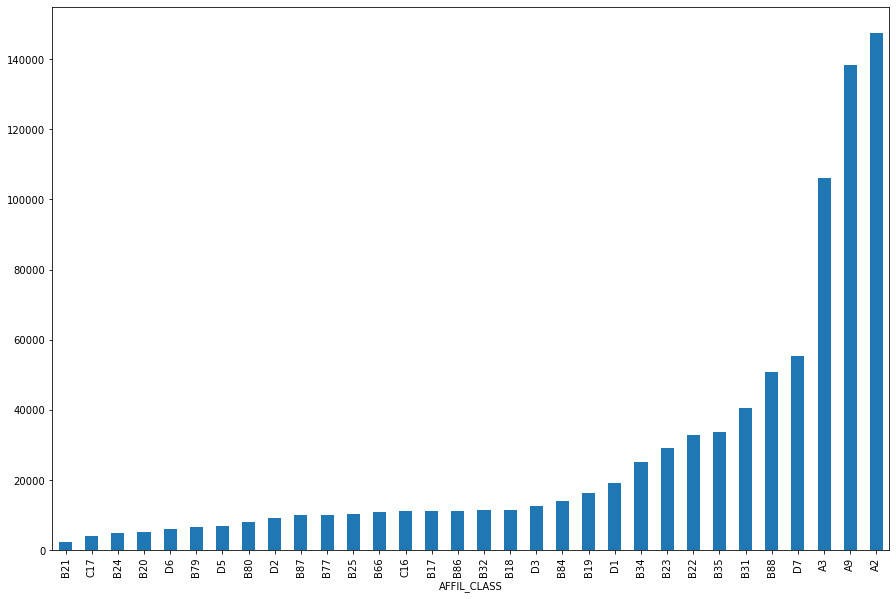

In [43]:
# 생활용품 - 대분류코드별 구매가격(평균)
d = df_nor.groupby('AFFIL_CLASS').mean()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')


<AxesSubplot:xlabel='AFFIL_CLASS'>

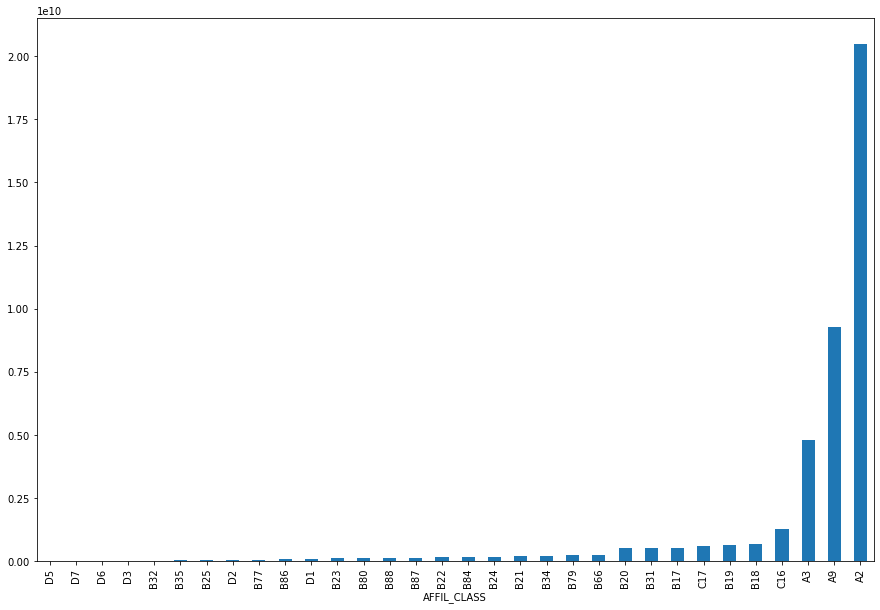

In [44]:
# 생활용품 - 대분류코드별 구매가격(총액)
d = df_nor.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
d.plot(kind = 'bar')


<AxesSubplot:xlabel='AFFIL_CLASS', ylabel='count'>

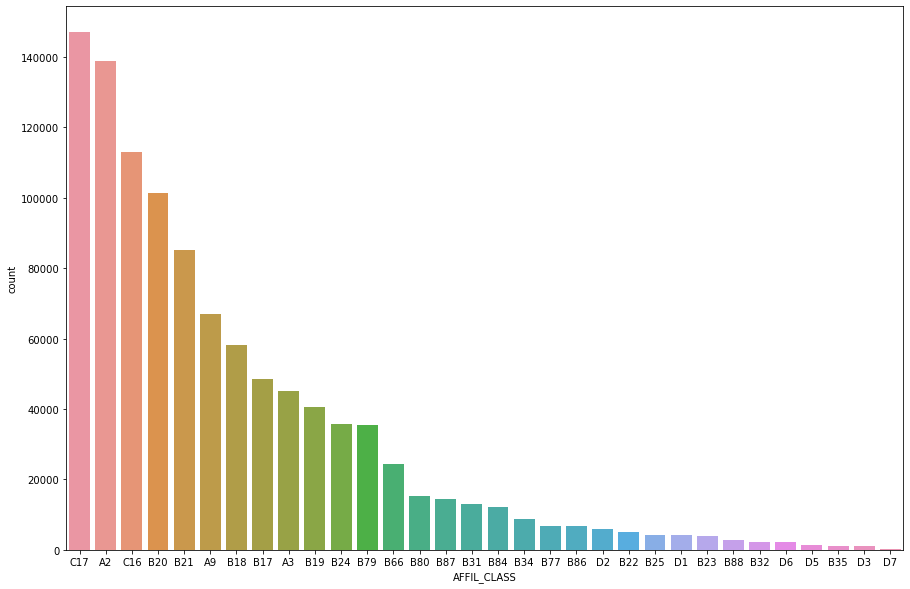

In [47]:
# 생활용품 - 대분류코드별 구매빈도
sns.countplot('AFFIL_CLASS',data = df_nor,order = df_nor['AFFIL_CLASS'].value_counts().index) 


In [4]:
a_df = df[df['AFFIL']=='A']

In [61]:
a_df.isnull().sum()

RECEIPTNO          0
CUSTNO             0
PURCHDATE          0
PURCHTIME          0
AFFIL              0
CLASSCODEL         0
CLASSCODEM         0
CLASSCODES         0
STORENO            0
GENDER             0
AGEGROUP           0
RESIDENCE      13341
PURCHAMOUNT        0
Year               0
AFFIL_CLASS        0
prod_cat           0
dtype: int64

<AxesSubplot:xlabel='prod_cat'>

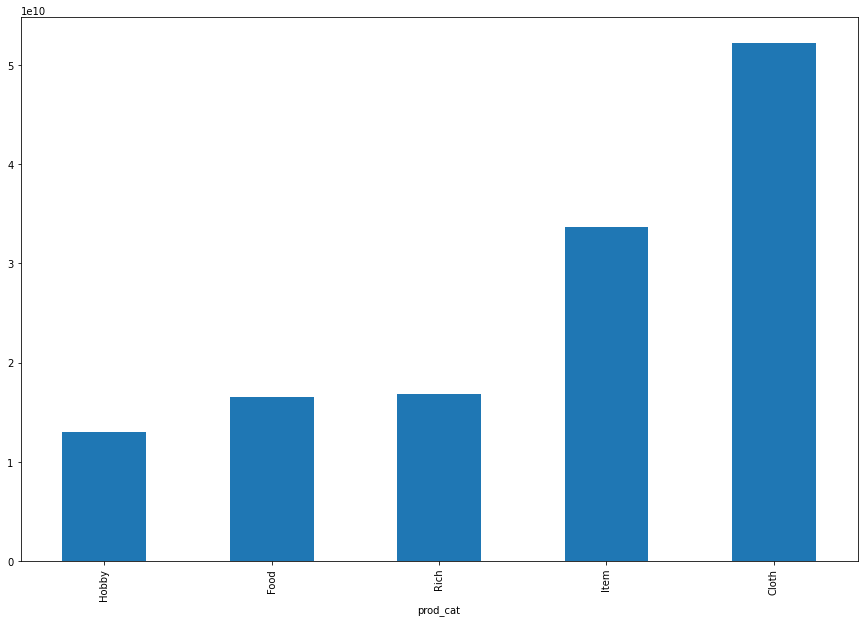

In [70]:
# 카테고리별 총매출 
a = a_df.groupby('prod_cat').sum()['PURCHAMOUNT'].sort_values()

a.plot(kind = 'bar')

<AxesSubplot:xlabel='prod_cat'>

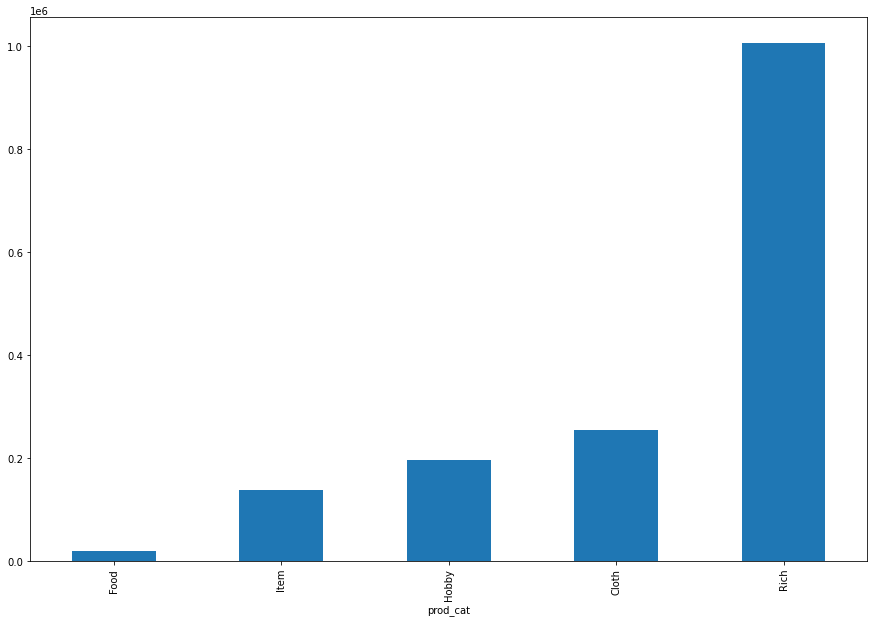

In [6]:
# 카테고리별 평균매출 

a = a_df.groupby('prod_cat').mean()['PURCHAMOUNT'].sort_values()

a.plot(kind = 'bar')

<AxesSubplot:xlabel='prod_cat', ylabel='count'>

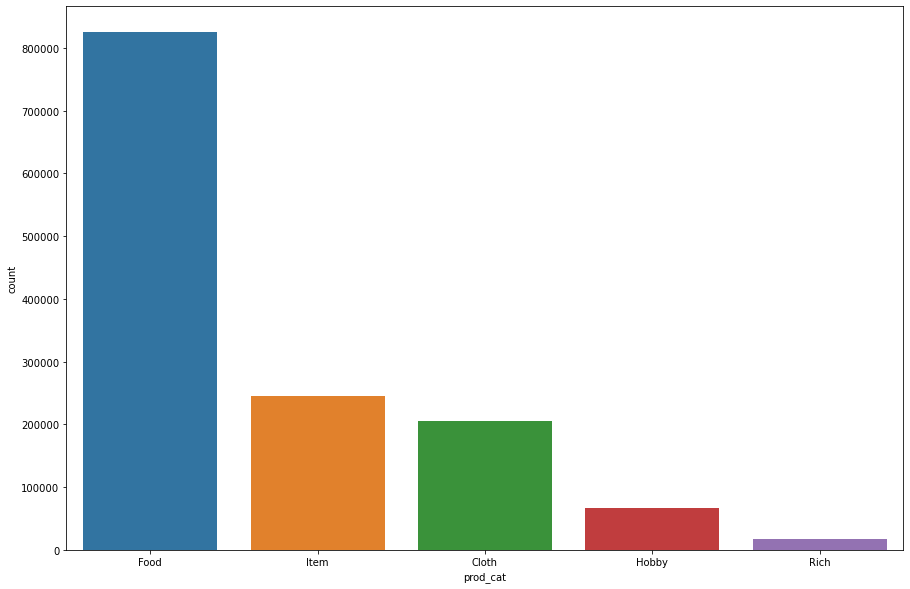

In [65]:
# 카테고리별 구매빈도

sns.countplot('prod_cat',data = a_df,order = a_df['prod_cat'].value_counts().index) 

<AxesSubplot:title={'center':'-- A -- \n '}, xlabel='AFFIL_CLASS', ylabel='total'>

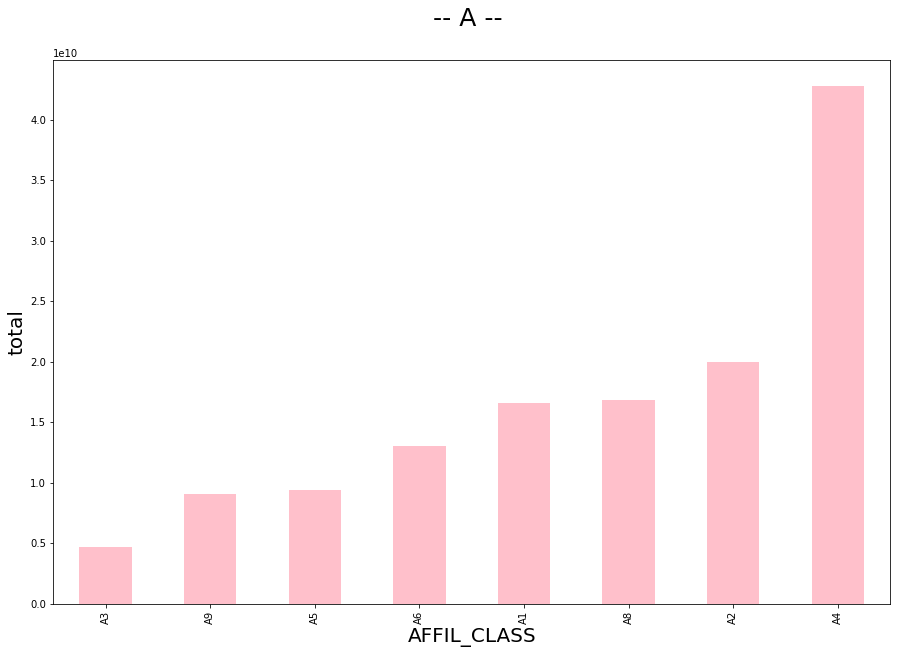

In [16]:
# A제휴사 대분류코드별 총매출
plt.title('-- A -- \n ', size = 25)
plt.xlabel('AFFIL',size =20)
plt.ylabel('total',size =20)

a = a_df.groupby('AFFIL_CLASS').sum()['PURCHAMOUNT'].sort_values()
a.plot(kind = 'bar', color = 'pink' )

A1 - 식품
A2 - 생활용품
A3 - 생활용품
A4 - 의류
A5 - 의류
A6 - 취미
A7 - 생활용품
A8 - 사치
A9 - 생활용품